# Working with API's

In [1]:
import requests
url = "https://api.github.com/search/repositories?q=language:python&sort=stars"
r = requests.get(url)
print("Status Code: ", r.status_code)

Status Code:  200


In [2]:
response_dict = r.json()

# results
print(response_dict.keys())

dict_keys(['total_count', 'incomplete_results', 'items'])


In [3]:
print("Total Repositories: ", response_dict['total_count'])

# information about repositories
repo_dicts = response_dict['items']
print("Repositories returned: ", len(repo_dicts))

Total Repositories:  13370121
Repositories returned:  30


In [4]:
# first repo

repo_dict = repo_dicts[0]
print("\n Keys: ", len(repo_dict))
for key in sorted(repo_dict.keys()):
    print(key)


 Keys:  80
allow_forking
archive_url
archived
assignees_url
blobs_url
branches_url
clone_url
collaborators_url
comments_url
commits_url
compare_url
contents_url
contributors_url
created_at
default_branch
deployments_url
description
disabled
downloads_url
events_url
fork
forks
forks_count
forks_url
full_name
git_commits_url
git_refs_url
git_tags_url
git_url
has_discussions
has_downloads
has_issues
has_pages
has_projects
has_wiki
homepage
hooks_url
html_url
id
is_template
issue_comment_url
issue_events_url
issues_url
keys_url
labels_url
language
languages_url
license
merges_url
milestones_url
mirror_url
name
node_id
notifications_url
open_issues
open_issues_count
owner
private
pulls_url
pushed_at
releases_url
score
size
ssh_url
stargazers_count
stargazers_url
statuses_url
subscribers_url
subscription_url
svn_url
tags_url
teams_url
topics
trees_url
updated_at
url
visibility
watchers
watchers_count
web_commit_signoff_required


In [5]:
print("\n Selected information about first repository: ")
print("Name: ", repo_dict['name'])
print("Owner: ", repo_dict['owner']['login'])
print("Stars: ", repo_dict['stargazers_count'])
print("Repository: ", repo_dict['html_url'])
print("Created: ", repo_dict['created_at'])
print("Updated: ", repo_dict['updated_at'])
print("Description: ", repo_dict['description'])


 Selected information about first repository: 
Name:  public-apis
Owner:  public-apis
Stars:  278570
Repository:  https://github.com/public-apis/public-apis
Created:  2016-03-20T23:49:42Z
Updated:  2024-02-07T04:53:17Z
Description:  A collective list of free APIs


In [6]:
print("\nSelected information about each repository:")
for repo_dict in repo_dicts:
     print('\nName:', repo_dict['name'])
     print('Owner:', repo_dict['owner']['login'])
     print('Stars:', repo_dict['stargazers_count'])
     print('Repository:', repo_dict['html_url'])
     print('Description:', repo_dict['description'])


Selected information about each repository:

Name: public-apis
Owner: public-apis
Stars: 278570
Repository: https://github.com/public-apis/public-apis
Description: A collective list of free APIs

Name: system-design-primer
Owner: donnemartin
Stars: 245381
Repository: https://github.com/donnemartin/system-design-primer
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.

Name: Python-100-Days
Owner: jackfrued
Stars: 146291
Repository: https://github.com/jackfrued/Python-100-Days
Description: Python - 100天从新手到大师

Name: stable-diffusion-webui
Owner: AUTOMATIC1111
Stars: 120327
Repository: https://github.com/AUTOMATIC1111/stable-diffusion-webui
Description: Stable Diffusion web UI

Name: HelloGitHub
Owner: 521xueweihan
Stars: 81887
Repository: https://github.com/521xueweihan/HelloGitHub
Description: :octocat: 分享 GitHub 上有趣、入门级的开源项目。Share interesting, entry-level open source projects on GitHub.

Name: thefuck
Owner: nvbn
St

In [7]:
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
names, stars = [], []
for repo in repo_dicts:
    names.append(repo['name'])
    stars.append(repo['stargazers_count'])

# visualization
my_style = LS("#333366", base_style=LCS)
chart = pygal.Bar(style=my_style, x_label_rotation=45, show_legend=False)
chart.title = "Most starred python ptojects on github"
chart.x_labels = names
chart.add('',stars)
chart.render_to_file('python_repos.svg')

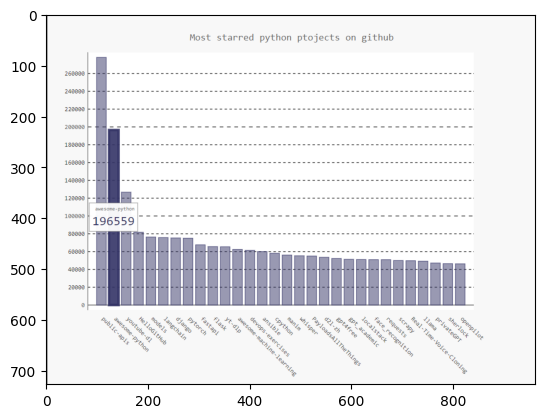

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def image_show(path):
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()
path="C:/Users/mirya/OneDrive/Pictures/Screenshots/Screenshot (199).png"
image_show(path)

Refining Pygal Charts

In [9]:
my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.title_font_size = 24
my_config.label_font_size = 14
my_config.major_label_font_size = 18
my_config.truncate_label = 15
my_config.show_y_guides = False
my_config.width = 1000
chart = pygal.Bar(my_config, style = my_style)
chart.title = 'Most-starred Python Projects on Github'
chart.x_labels = names
chart.add('',stars)
chart.render_to_file('python_repo.svg')

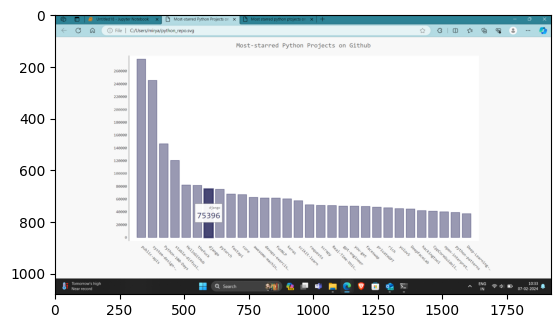

In [10]:
path = "C:/Users/mirya/OneDrive/Pictures/Screenshots/Screenshot (200).png"
image_show(path)

Adding custom Tooltips

In [11]:
# hovering the cursor over an individual bar shows the information about project
# description also 

chart = pygal.Bar(style=my_style, x_label_rotation=45, show_legend=False)
chart.title = 'Python Projects'
chart.x_labels = ['django','fast-api','awesome-machine-learning']
plt_dicts = [
    {'value': 75396, 'label': 'Description'},
    {'value': 67762, 'label': 'Description'},
    {'value': 62586, 'label': 'Description'},
]
chart.add('',plt_dicts)
chart.render_to_file('bar_description.svg')

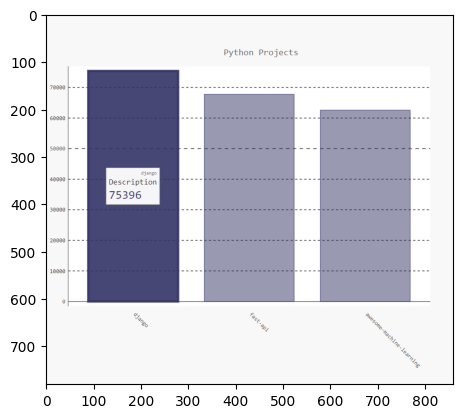

In [13]:
path = "C:/Users/mirya/OneDrive/Pictures/Screenshots/Screenshot 2024-02-07 104256.png"
image_show(path)

In [17]:
# plotting for total data
repo_dicts = response_dict['items']
names, plot_dicts = [], []
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])
    plt_dict = {
        'value': repo_dict['stargazers_count'],
        'label': repo_dict['description'],
    }
    plot_dicts.append(plt_dict)

my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.title_font_size = 24
my_config.label_font_size = 14
my_config.major_label_font_size = 18
my_config.truncate_label = 15
my_config.show_y_guides = False
my_config.width = 1000
chart = pygal.Bar(my_config, style = my_style)
chart.title = 'Most-starred Python Projects on Github'
chart.x_labels = names
chart.add('',plot_dicts)
chart.render_to_file('python_repo.svg')

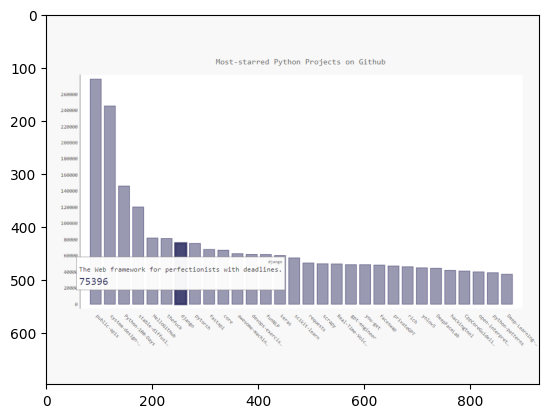

In [18]:
path = "C:/Users/mirya/OneDrive/Pictures/Screenshots/Screenshot (201).png"
image_show(path)